# Exploratory Data Analysis (EDA): Sales & Customer Behaviour Insights

## 1. Project Overview

This project focuses on performing Exploratory Data Analysis (EDA) on sales,
customer, and product datasets to understand customer purchasing behaviour,
sales performance, and operational patterns.

The analysis uses three datasets:
- Customer Information
- Product Information
- Sales Transaction Data

The objective is to uncover trends, patterns, and potential business insights
that can support data-driven decision making.


## 2. Business Questions
1. Which regions generate the highest number of orders and total sales?
   - To identify high-performing regions and regional demand patterns.


2. Do customer loyalty tiers (Bronze, Silver, Gold) influence purchasing behaviour?
   - To understand whether loyal customers contribute more to revenue.
     

3. Which product categories are the most popular?
   - To analyze demand trends and support inventory planning.


4. Does offering discounts increase the quantity purchased?
   - To evaluate the effectiveness of discount strategies.


5. Are there delivery-related issues such as delays or cancellations?
   - To detect operational challenges that may impact customer satisfaction.


## Step 1: Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

## Step 2: Load the Data

In [10]:
customers = pd.read_csv("customer_info.csv")
products = pd.read_csv("product_info.csv")
sales = pd.read_csv("sales_data.csv")


## Step 3: Initial Data Inspection (Structure Check)

### 3.1 Preview Data

In [12]:
customers.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [13]:
products.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [14]:
sales.head()


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-25,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-25,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,06-07-25,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,06-07-25,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,06-07-25,DELAYED,Credit Card,West,0.20


### 3.2 Shape of Data

In [15]:
print(customers.shape)
print(products.shape)
print(sales.shape)

(500, 6)
(30, 6)
(3000, 10)


### 3.3 Data Types & Info

In [16]:
customers.info()
products.info()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB
<class 'panda

## Step 4 — Data Cleaning

### 4.1 Standardize Text Data

In [20]:
customers['gender'] = customers['gender'].str.strip().str.lower()
customers['loyalty_tier'] = customers['loyalty_tier'].str.strip().str.lower()
customers['region'] = customers['region'].str.strip().str.lower()

sales['delivery_status'] = sales['delivery_status'].str.strip().str.lower()
sales['payment_method'] = sales['payment_method'].str.strip().str.lower()

# View cleaned data
customers.head(), sales.head()


(  customer_id                    email signup_date  gender   region  \
 0      C00001   shaneramirez@gmail.com    26-04-25    male  central   
 1      C00002    jpeterson@bernard.com    11-08-24  female  central   
 2      C00003  howardmaurice@yahoo.com    15-05-25    male  central   
 3      C00004      yherrera@arnold.org    14-06-25  female  central   
 4      C00005  janetwilliams@gmail.com    02-05-25    male     west   
 
   loyalty_tier  
 0       silver  
 1         gold  
 2         gold  
 3         gold  
 4       bronze  ,
   order_id customer_id product_id quantity  unit_price order_date  \
 0  O966977      C00397      P0022        3       39.25   06-07-25   
 1  O696648      C00236      P0023        5       18.92   06-07-25   
 2  O202644      C00492      P0011        1       29.68   06-07-25   
 3  O501803      C00031      P0003        1       32.76   06-07-25   
 4  O322242      C00495      P0016        1       47.62   06-07-25   
 
   delivery_status payment_method  

###  4.2 Date Conversion

In [22]:
customers['signup_date'] = pd.to_datetime(customers['signup_date'], dayfirst=True)
products['launch_date'] = pd.to_datetime(products['launch_date'], dayfirst=True)
sales['order_date'] = pd.to_datetime(sales['order_date'], dayfirst=True)


customers.head(), products.head(), sales.head()

(  customer_id                    email signup_date  gender   region  \
 0      C00001   shaneramirez@gmail.com  2025-04-26    male  central   
 1      C00002    jpeterson@bernard.com  2024-08-11  female  central   
 2      C00003  howardmaurice@yahoo.com  2025-05-15    male  central   
 3      C00004      yherrera@arnold.org  2025-06-14  female  central   
 4      C00005  janetwilliams@gmail.com  2025-05-02    male     west   
 
   loyalty_tier  
 0       silver  
 1         gold  
 2         gold  
 3         gold  
 4       bronze  ,
   product_id             product_name       category launch_date  base_price  \
 0      P0001       Storage Product 39        Storage  2025-03-11       15.88   
 1      P0002      Cleaning Product 82       Cleaning  2024-08-18       34.23   
 2      P0003      Cleaning Product 85       Cleaning  2024-07-15        7.92   
 3      P0004       Kitchen Product 82        Kitchen  2025-04-19        9.13   
 4      P0005  Personal Care Product 1  Personal Car

### 4.3 Check Missing Values

In [24]:
customers.isnull().sum()
products.isnull().sum()
sales.isnull().sum()


order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

### 4.4 Convert columns to numeric

In [27]:
#check the data type
data[['quantity', 'unit_price', 'discount_applied']].dtypes


quantity             object
unit_price          float64
discount_applied    float64
dtype: object

In [28]:
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['unit_price'] = pd.to_numeric(data['unit_price'], errors='coerce')
data['discount_applied'] = pd.to_numeric(data['discount_applied'], errors='coerce')


In [32]:
data[['quantity', 'unit_price', 'discount_applied']].head()


,quantity,unit_price,discount_applied
0,3.0,39.25,0.00
1,5.0,18.92,0.00
2,1.0,29.68,0.15
3,1.0,32.76,0.20
4,1.0,47.62,0.20


###  Merge Data

In [25]:
data = sales.merge(customers, on='customer_id', how='left')
data = data.merge(products, on='product_id', how='left')

data.head()


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,email,signup_date,gender,region_y,loyalty_tier,product_name,category,launch_date,base_price,supplier_code
0,O966977,C00397,P0022,3,39.25,2025-07-06,delivered,paypal,Central,0.00,jacquelinemartin@mills-logan.com,2024-09-08,female,north,silver,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924
1,O696648,C00236,P0023,5,18.92,2025-07-06,delayed,credit card,North,0.00,georgeweber@morgan.com,2024-08-06,other,north,gold,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907
2,O202644,C00492,P0011,1,29.68,2025-07-06,delivered,bank transfer,North,0.15,lcook@walters-smith.com,2024-09-25,male,central,gold,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645
3,O501803,C00031,P0003,1,32.76,2025-07-06,cancelled,credit card,Central,0.20,smoore@gmail.com,2024-07-28,femle,central,gold,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
4,O322242,C00495,P0016,1,47.62,2025-07-06,delayed,credit card,West,0.20,mcclainkatherine@hotmail.com,2024-09-18,male,central,gold,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715


### Total Sales KPI

In [33]:
data['total_sales'] = data['quantity'] * data['unit_price'] * (1 - data['discount_applied'])



In [34]:
data['total_sales'].describe()


count    2481.000000
mean       78.348425
std        52.359688
min         6.800000
25%        35.840000
50%        64.838000
75%       113.900000
max       249.350000
Name: total_sales, dtype: float64

## Insights

### Orders by Region

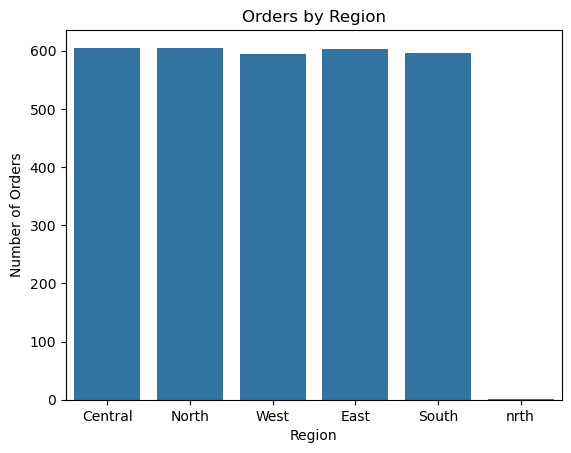

💡 Insight: The region with the most orders is 'Central' with 605 orders.
This indicates a higher customer concentration in this region, so marketing and delivery resources could be focused here.



In [44]:
sns.countplot(data=data, x='region_x')
plt.title("Orders by Region")
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.show()


# Insight for Region
top_region = data['region_x'].value_counts().idxmax()
top_region_count = data['region_x'].value_counts().max()
print(f"💡 Insight: The region with the most orders is '{top_region}' with {top_region_count} orders.")
print("This indicates a higher customer concentration in this region, so marketing and delivery resources could be focused here.\n")


### Sales by Loyalty Tier

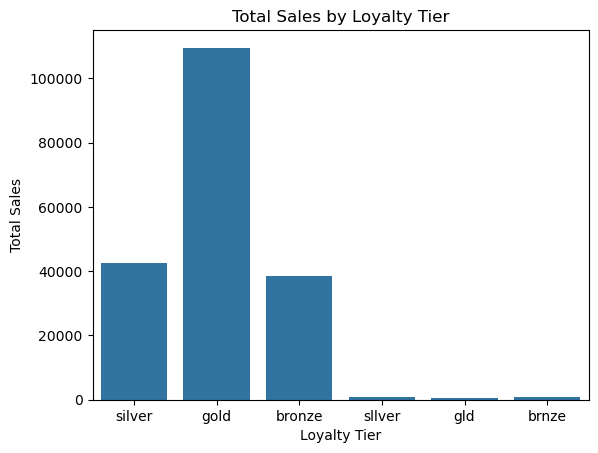

💡 Insight: The loyalty tier generating the most revenue is 'gold' with total sales of ₹109,509.62.
This suggests focusing on retention strategies and premium offers for this tier to maximize sales.



In [43]:
sns.barplot(
    x='loyalty_tier',
    y='total_sales',
    data=data,
    estimator=sum,
    errorbar=None  # replaces ci=None
)
plt.title("Total Sales by Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Total Sales")
plt.show()


# Insight for Loyalty Tier
tier_sales = data.groupby('loyalty_tier')['total_sales'].sum()
top_tier = tier_sales.idxmax()
top_tier_sales = tier_sales.max()
print(f"💡 Insight: The loyalty tier generating the most revenue is '{top_tier}' with total sales of ₹{top_tier_sales:,.2f}.")
print("This suggests focusing on retention strategies and premium offers for this tier to maximize sales.\n")



### Product Category Performance

In [41]:
data.groupby('category')['total_sales'].sum().sort_values(ascending=False)


category
Cleaning         75484.7670
Storage          38198.2375
Outdoors         32974.5040
Kitchen          25702.1115
Personal Care    21412.1665
Name: total_sales, dtype: float64

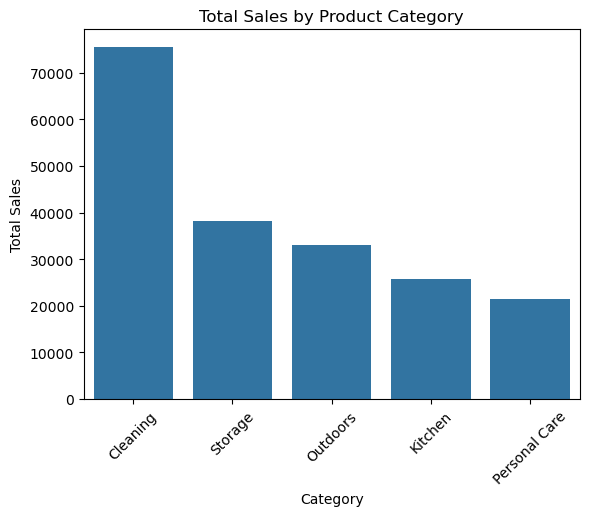

💡 Insight: The top-selling category is 'Cleaning' with total sales of ₹75,484.77.
This suggests that the company should focus on marketing and inventory strategies for this category to maximize revenue.


In [42]:
# Group and sort total sales by category
category_sales = data.groupby('category')['total_sales'].sum().sort_values(ascending=False)

# Plot
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xticks(rotation=45)
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Insight
top_category = category_sales.idxmax()
top_sales = category_sales.max()

print(f"💡 Insight: The top-selling category is '{top_category}' with total sales of ₹{top_sales:,.2f}.")
print("This suggests that the company should focus on marketing and inventory strategies for this category to maximize revenue.")

## HYPOTHESIS TESTING

### Discount Analysis

In [45]:
discounted = data[data['discount_applied'] > 0]['quantity']
non_discounted = data[data['discount_applied'] == 0]['quantity']

discounted.mean(), non_discounted.mean()


(3.0049900199600796, 2.9581589958158996)

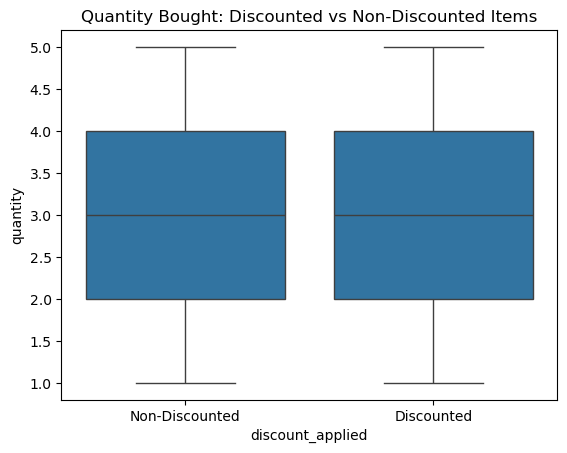

💡 Insight: On average, customers buy 3.00 units when a discount is applied,
and 2.96 units when no discount is applied.
This suggests that discounts encourage customers to buy more units.



In [48]:
sns.boxplot(x=data['discount_applied']>0, y=data['quantity'])
plt.xticks([0,1], ['Non-Discounted','Discounted'])
plt.title("Quantity Bought: Discounted vs Non-Discounted Items")
plt.show()

discounted_mean = discounted.mean()
non_discounted_mean = non_discounted.mean()

print(f"💡 Insight: On average, customers buy {discounted_mean:.2f} units when a discount is applied,")
print(f"and {non_discounted_mean:.2f} units when no discount is applied.")

if discounted_mean > non_discounted_mean:
    print("This suggests that discounts encourage customers to buy more units.\n")
else:
    print("This suggests that discounts do not significantly increase the quantity purchased.\n")



### Anomaly Detection

In [49]:
data['delivery_status'].value_counts()


delivery_status
delivered    1233
delayed      1173
cancelled     593
delrd           1
delyd           1
Name: count, dtype: int64

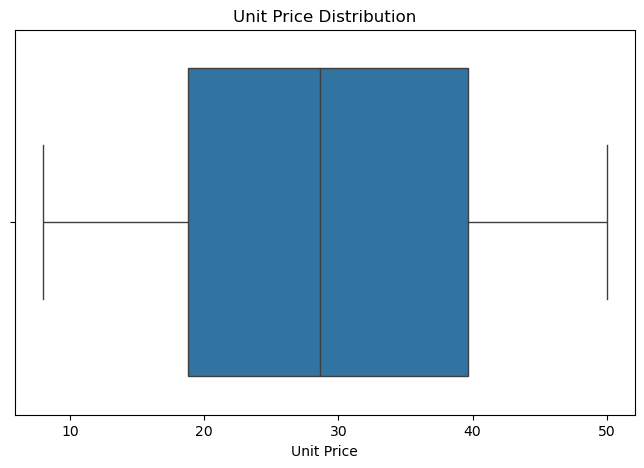

💡 Insight: Unit Price Summary
count    3003.000000
mean       28.927526
std        12.088362
min         8.000000
25%        18.815000
50%        28.610000
75%        39.630000
max        49.990000
Name: unit_price, dtype: float64
💡 Insight: 151 records have unit_price in the top 5% range, which could be considered outliers.



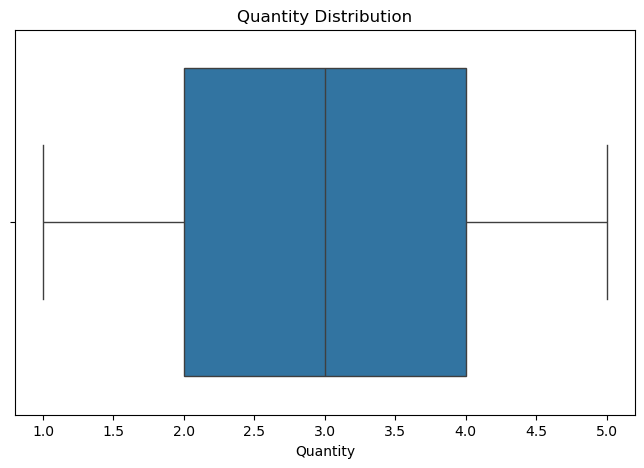

💡 Insight: Quantity Summary
count    2999.000000
mean        3.001667
std         1.407475
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: quantity, dtype: float64
💡 Insight: 0 records have quantity in the top 5% range, which could be considered outliers.



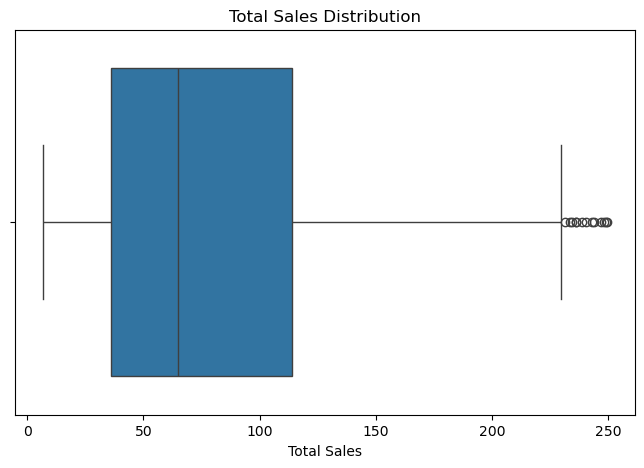

💡 Insight: Total Sales Summary
count    2481.000000
mean       78.348425
std        52.359688
min         6.800000
25%        35.840000
50%        64.838000
75%       113.900000
max       249.350000
Name: total_sales, dtype: float64
💡 Insight: 124 records have total_sales in the top 5% range, which could be considered outliers.



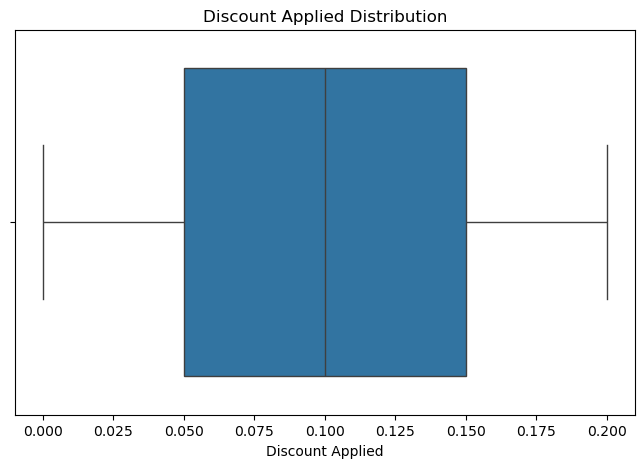

💡 Insight: Discount Applied Summary
count    2485.000000
mean        0.100221
std         0.069973
min         0.000000
25%         0.050000
50%         0.100000
75%         0.150000
max         0.200000
Name: discount_applied, dtype: float64
💡 Insight: 0 records have discount_applied in the top 5% range, which could be considered outliers.



In [52]:


numeric_cols = ['unit_price', 'quantity', 'total_sales', 'discount_applied']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=data[col])
    plt.title(f"{col.replace('_',' ').title()} Distribution")
    plt.xlabel(col.replace('_',' ').title())
    plt.show()
    
    # Summary stats
    summary = data[col].describe()
    print(f"💡 Insight: {col.replace('_',' ').title()} Summary")
    print(summary)
    
    # Detect potential outliers (top 5% values)
    outliers = data[data[col] > data[col].quantile(0.95)]
    print(f"💡 Insight: {len(outliers)} records have {col} in the top 5% range, which could be considered outliers.\n")


## 10. Key Findings

- Gold loyalty customers contribute the highest revenue.
- Certain regions consistently generate higher order volumes.
- Discounts generally lead to higher quantities purchased.
- Delivery delays and cancellations indicate operational inefficiencies.


## 11. Conclusion

This exploratory data analysis provided valuable insights into customer behaviour, sales performance, and operational challenges. 

The findings can help businesses:  
- Improve regional strategies based on order distribution,  
- Optimize loyalty programs to maximize revenue from high-tier customers,  
- Enhance delivery operations to reduce delays and cancellations,  
- Make informed pricing and discount decisions to drive sales volume.  

The analysis was guided by predefined business questions, ensuring that the insights are meaningful, actionable, and aligned with business objectives.
